<a href="https://colab.research.google.com/github/Niveditha-A/CreditCard-Prediction/blob/main/Creditcard_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/My Drive/UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

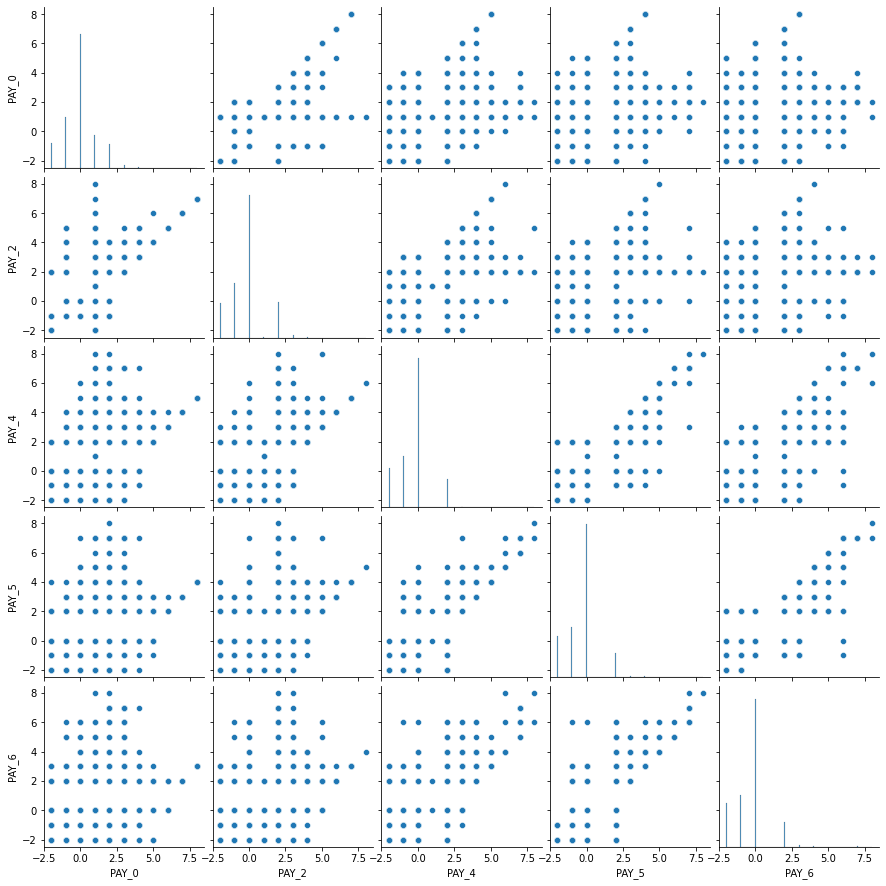

In [8]:
crr_df= df[['PAY_0','PAY_2','PAY_4','PAY_5','PAY_6']]
sns.pairplot(crr_df)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


Text(0.5, 1.0, 'COUNT OF CREDIT CARDS DEFALUTERS')

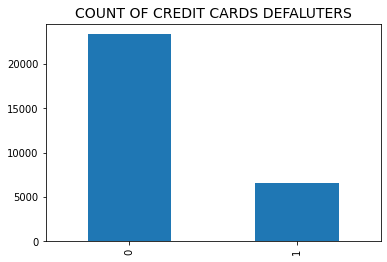

In [9]:
print(df['default.payment.next.month'].value_counts())
df['default.payment.next.month'].value_counts().plot(kind='bar')
plt.title('COUNT OF CREDIT CARDS DEFALUTERS', size=14)

In [10]:
df.shape

(30000, 25)

In [11]:
dum_df = pd.get_dummies(df)

In [12]:
dum_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


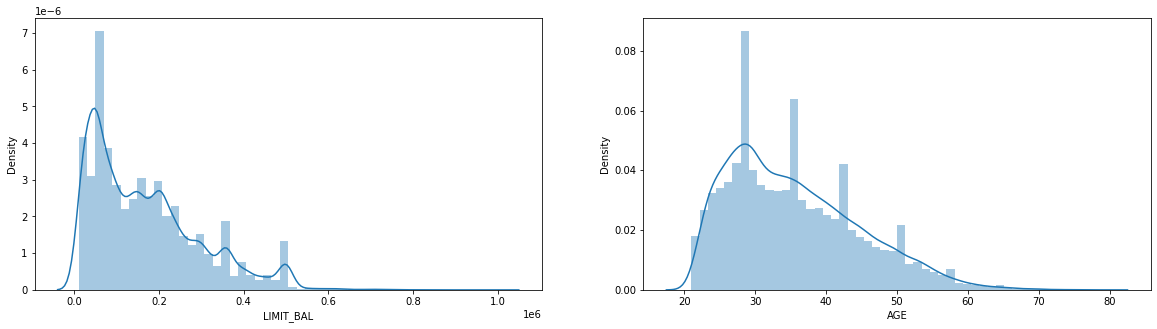

In [21]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

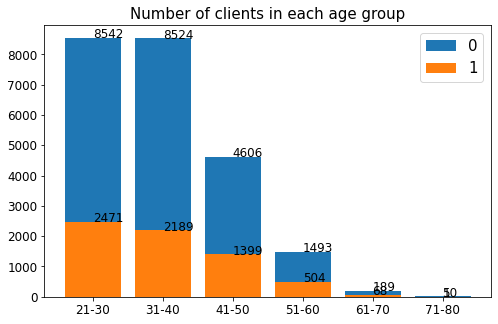

In [27]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['default.payment.next.month'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['default.payment.next.month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
    plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

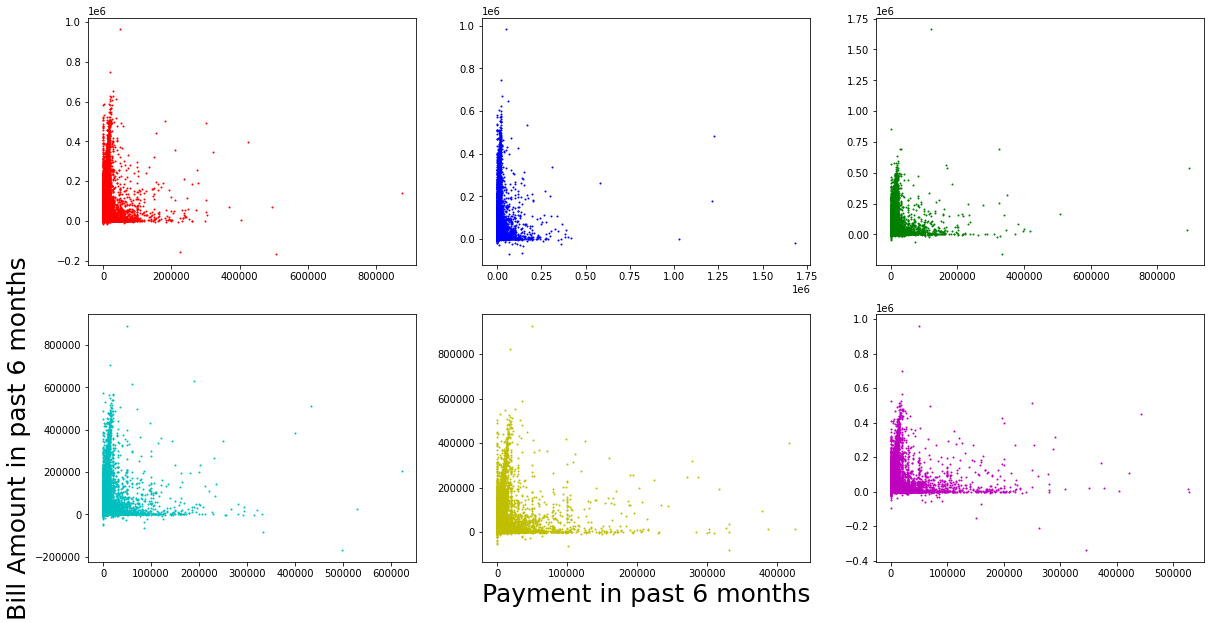

In [29]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

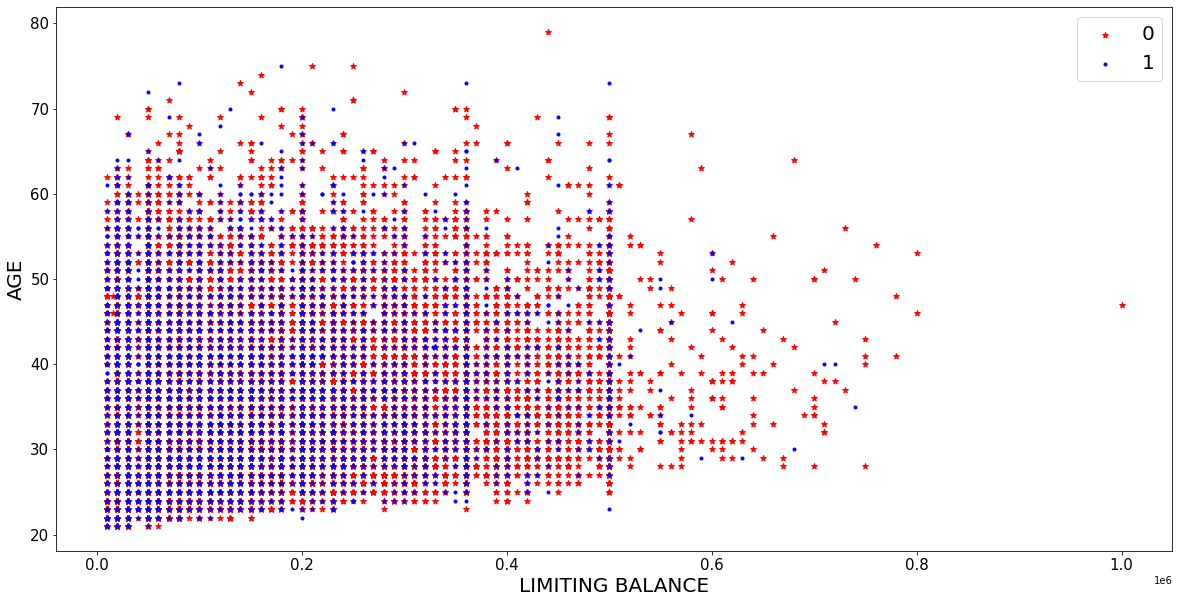

In [31]:
y1 = df.AGE[df["default.payment.next.month"] == 0]
y2 = df.AGE[df["default.payment.next.month"] == 1]
x1 = df.LIMIT_BAL[df["default.payment.next.month"] == 0]
x2 = df.LIMIT_BAL[df["default.payment.next.month"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()

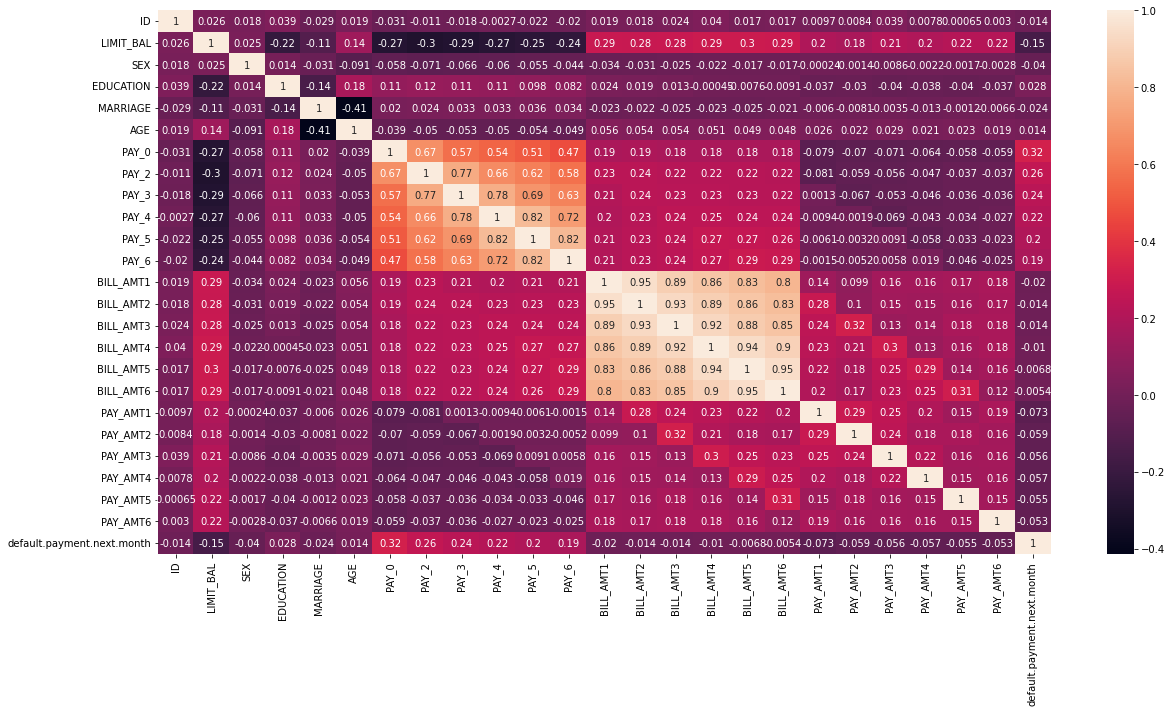

In [35]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

**LOGISTIC REGRESSION**

In [13]:
y = dum_df['default.payment.next.month'].values
X = dum_df.drop('default.payment.next.month',axis=1).values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
C = [10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty =  ['l1','l2']
for i in C:
  for j in solver:
    for k in penalty:
      if j=="newton-cg" or j=="lbfgs":
        k='l2'
      lr = LogisticRegression(C=i,solver=j,penalty=k)
      lr.fit(X_train, y_train)
      y_predict = lr.predict(X_test)
      print("Accuracy with: ","C=",i,'penalty=',j,'solver=',k,"is",accuracy_score(y_test,y_predict))
      print("Missclassified", (y_predict!=y_test).sum())
      print("Confusion Matrix",confusion_matrix(y_predict,y_test),'\n')
      print("*"*40)

Accuracy with:  C= 10 penalty= newton-cg solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= newton-cg solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= lbfgs solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= lbfgs solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= liblinear solver= l1 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= liblinear solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion

Based on the above results Highest Accuracy of : 81.64% is attained.

PREDICTION USING TENSORFLOW/KERAS

In [37]:
import tensorflow as tf

In [38]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(50, activation='relu'),    #Input layer
  tf.keras.layers.Dense(40, activation='relu'),     #Hidden Layer
  tf.keras.layers.Dense(1,activation='sigmoid')     #Output layer
])

In [43]:
input_shape = X.shape  
model.build(input_shape) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (30000, 50)               1250      
                                                                 
 dense_1 (Dense)             (30000, 40)               2040      
                                                                 
 dense_2 (Dense)             (30000, 1)                41        
                                                                 
Total params: 3,331
Trainable params: 3,331
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
657/657 [==============================] - 3s 2ms/step - loss: 0.4735 - accuracy: 0.8055
Epoch 2/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.8158
Epoch 3/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8186
Epoch 4/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.8179
Epoch 5/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8196
Epoch 6/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.8206
Epoch 7/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.8203
Epoch 8/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8210
Epoch 9/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4251 - accuracy: 0.8219
Epoch 10/50
657/657 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8228

Highest Accuracy of approximate 84% is attained using Keras model.